In [19]:
import pandas as pd

# ここにあなたのExcelファイルのパスを指定してください
# 例: file_path = 'C:/Users/YourName/Documents/SSDSE/SSDSE-A_municipalities.xlsx'
file_path = '/Users/kanaha/statistics/SSDSE-D-2023.xlsx'

# ExcelファイルをDataFrameとして読み込む
# シート名が 'Sheet1' でない場合は、'sheet_name' を適宜変更してください
df = pd.read_excel(file_path)

# データの最初の5行を表示して、正しく読み込めたか確認
print(df.head())

  SSDSE-D-2023   2021年 Prefecture         MA00           MB00  MB01 MB011  \
0         男女の別   地域コード       都道府県  推定人口（10歳以上）  学習・自己啓発・訓練の総数   外国語    英語   
1         0_総数  R00000         全国       112462           39.6  14.1  12.8   
2         0_総数  R01000        北海道         4614             35  11.1   9.9   
3         0_総数  R02000        青森県         1090           25.4   7.4   6.6   
4         0_総数  R03000        岩手県         1075           28.9   7.7   7.1   

      MB012             MB02        MB021  ... MG20   MG51 MG52 MG53  \
0  英語以外の外国語  商業実務・ビジネス関係(総数)  パソコンなどの情報処理  ...  その他  通勤・通学   仕事   学業   
1       4.2             20.1         16.5  ...   16     79  340  393   
2       3.3               17         14.1  ...   15     64  343  391   
3         2             12.7         10.3  ...   12     61  370  423   
4       2.4             12.8         10.3  ...   17     63  362  472   

       MH01      MH02      MH03      MH04      MH51       MH52  
0        起床      朝食開始      夕食開始        

In [20]:
#欠損値の確認
print(df.isnull().sum())

SSDSE-D-2023    0
2021年           0
Prefecture      0
MA00            0
MB00            0
               ..
MH02            0
MH03            0
MH04            0
MH51            0
MH52            0
Length: 124, dtype: int64


In [26]:
# Excelファイルを読み込む際に、ヘッダーを2行目（インデックス1）にする場合
# （Excelの1行目がインデックス0、2行目がインデックス1となるため）
df = pd.read_excel(file_path, header=1)
#２列目を削除する
df = df.drop(df.columns[1], axis=1)

# この場合、読み込んだデータフレームの最初の列が「男女の別」になるはずです。
# その上で「SSDSE-D-2023」という列がまだ残っている場合に、上記の drop() を実行します。
print(df.head())

   男女の別 都道府県  推定人口（10歳以上）  学習・自己啓発・訓練の総数   外国語    英語  英語以外の外国語  \
0  0_総数   全国       112462           39.6  14.1  12.8       4.2   
1  0_総数  北海道         4614           35.0  11.1   9.9       3.3   
2  0_総数  青森県         1090           25.4   7.4   6.6       2.0   
3  0_総数  岩手県         1075           28.9   7.7   7.1       2.4   
4  0_総数  宮城県         2065           37.5  12.4  10.9       4.0   

   商業実務・ビジネス関係(総数)  パソコンなどの情報処理  商業実務・ビジネス関係  ...  その他.4  通勤・通学.1  仕事.1  学業.1  \
0             20.1         16.5          8.5  ...     16       79   340   393   
1             17.0         14.1          6.7  ...     15       64   343   391   
2             12.7         10.3          5.2  ...     12       61   370   423   
3             12.8         10.3          5.4  ...     17       63   362   472   
4             18.9         16.0          7.4  ...     16       73   352   395   

         起床      朝食開始      夕食開始        就寝        出勤  仕事からの帰宅時間  
0  06:38:00  07:11:00  18:58:00  23:04:00  08:20:00

In [30]:
filtered_df = df[(df['男女の別'] == '1_男') & (df['都道府県'] == '全国')]
filtered_df2= df[(df['男女の別'] == '2_女') & (df['都道府県'] == '全国')]
print(filtered_df, filtered_df2)

   男女の別 都道府県  推定人口（10歳以上）  学習・自己啓発・訓練の総数   外国語    英語  英語以外の外国語  \
48  1_男   全国        54829           39.8  14.3  13.5       3.5   

    商業実務・ビジネス関係(総数)  パソコンなどの情報処理  商業実務・ビジネス関係  ...  その他.4  通勤・通学.1  仕事.1  \
48             25.0         20.1         11.5  ...     15       84   387   

    学業.1        起床      朝食開始      夕食開始        就寝        出勤  仕事からの帰宅時間  
48   383  06:43:00  07:05:00  19:07:00  23:06:00  08:02:00   19:08:00  

[1 rows x 123 columns]    男女の別 都道府県  推定人口（10歳以上）  学習・自己啓発・訓練の総数   外国語    英語  英語以外の外国語  \
96  2_女   全国        57633           39.5  13.9  12.2       4.8   

    商業実務・ビジネス関係(総数)  パソコンなどの情報処理  商業実務・ビジネス関係  ...  その他.4  通勤・通学.1  仕事.1  \
96             15.5         13.0          5.6  ...     17       71   282   

    学業.1        起床      朝食開始      夕食開始        就寝        出勤  仕事からの帰宅時間  
96   404  06:33:00  07:17:00  18:49:00  23:02:00  08:44:00   17:47:00  

[1 rows x 123 columns]


## 生活時間に関する結果

結合後のデータフレーム:
   男女の別 都道府県  推定人口（10歳以上）  学習・自己啓発・訓練の総数   外国語    英語  英語以外の外国語  \
48   男性   全国        54829           39.8  14.3  13.5       3.5   
96   女性   全国        57633           39.5  13.9  12.2       4.8   

    商業実務・ビジネス関係(総数)  パソコンなどの情報処理  商業実務・ビジネス関係  ...  その他.4  通勤・通学.1  仕事.1  \
48             25.0         20.1         11.5  ...     15       84   387   
96             15.5         13.0          5.6  ...     17       71   282   

    学業.1        起床      朝食開始      夕食開始        就寝        出勤  仕事からの帰宅時間  
48   383  06:43:00  07:05:00  19:07:00  23:06:00  08:02:00   19:08:00  
96   404  06:33:00  07:17:00  18:49:00  23:02:00  08:44:00   17:47:00  

[2 rows x 123 columns]
--------------------------------------------------


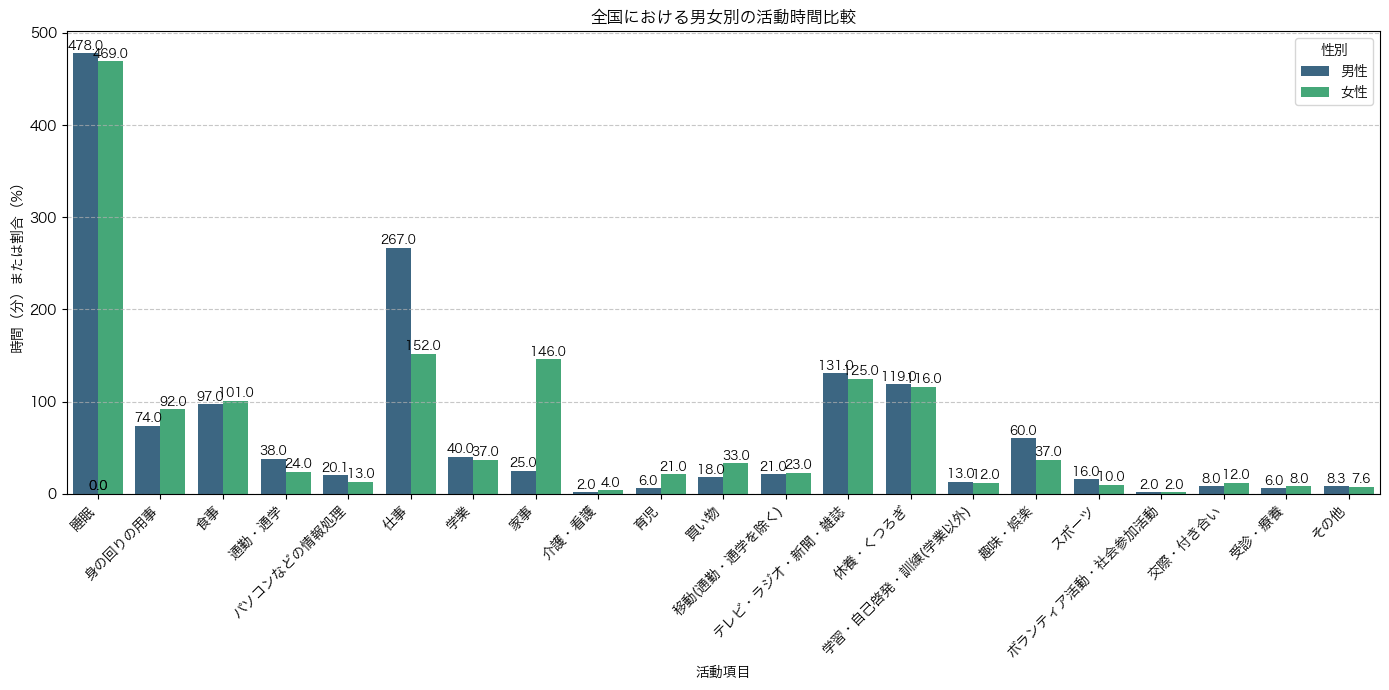

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Hiragino Sans GB' # Macの場合の例
plt.rcParams['axes.unicode_minus'] = False # マイナス記号を正しく表示するため

# 二つのデータフレームを縦に結合する
df_combined = pd.concat([filtered_df, filtered_df2])

# '男女の別' 列の値を「男性」「女性」に変換して、グラフ表示を分かりやすくする
df_combined['男女の別'] = df_combined['男女の別'].replace({'1_男': '男性', '2_女': '女性'})

print("結合後のデータフレーム:")
print(df_combined)
print("-" * 50)

# --- 可視化したい項目リストの定義 ---
# 数値で比較できる活動時間系の項目
# これらの列がデータに存在することを確認してください
activity_items = [
    '睡眠',
    '身の回りの用事',
    '食事',
    '通勤・通学',
    'パソコンなどの情報処理',
    '仕事', 
    '学業', 
    '家事',
    '介護・看護',
    '育児',
    '買い物',
    '移動(通勤・通学を除く)',
    'テレビ・ラジオ・新聞・雑誌',
    '休養・くつろぎ',
    '学習・自己啓発・訓練(学業以外)',
    '趣味・娯楽',
    'スポーツ',
    'ボランティア活動・社会参加活動',
    '交際・付き合い',
    '受診・療養',
    'その他'
]

# # 時刻データとして比較したい生活時間系の項目
# # これらの列がデータに存在することを確認してください
# time_items = [
#     '起床',
#     '朝食開始',
#     '夕食開始',
#     '就寝',
#     '出勤',
#     '仕事からの帰宅時間'
# ]

### 1. 活動時間系の項目を棒グラフで比較
# データフレームを縦長形式に変換（melt）して、複数の項目を一度にプロットしやすくする
df_melted_activities = df_combined.melt(
    id_vars=['男女の別'],
    value_vars=activity_items,
    var_name='活動項目',
    value_name='時間_または_割合'
)

plt.figure(figsize=(14, 7))
sns.barplot(x='活動項目', y='時間_または_割合', hue='男女の別', data=df_melted_activities, palette='viridis')

# 各棒の上に数値を表示
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 5),
                       textcoords='offset points', fontsize=9)

plt.title('全国における男女別の活動時間比較')
plt.xlabel('活動項目')
plt.ylabel('時間（分）または割合（%）') # 項目によって単位が異なる可能性があるので適宜変更
plt.xticks(rotation=45, ha='right') # 項目名が長いので回転
plt.legend(title='性別')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # レイアウトを調整
plt.show()

## 生活行動に関する結果

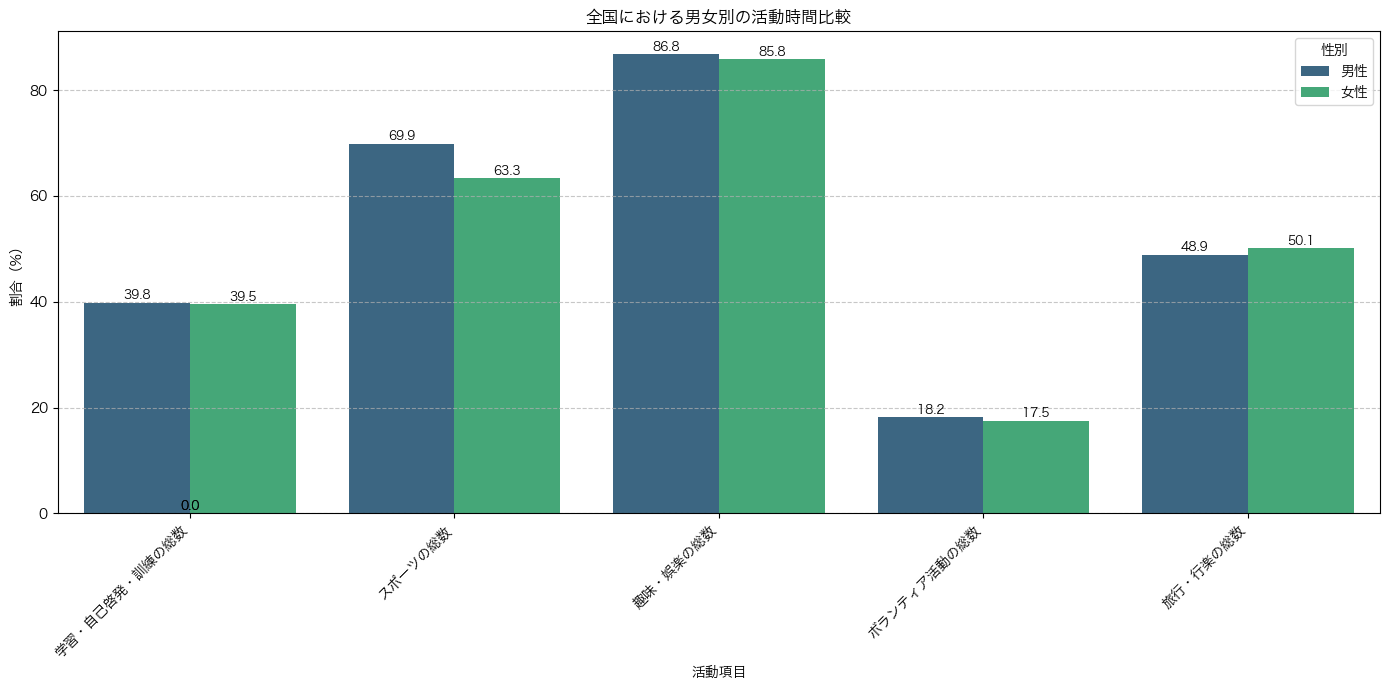

In [40]:
activity_items2 = [
    '学習・自己啓発・訓練の総数',
    'スポーツの総数',
    '趣味・娯楽の総数',
    'ボランティア活動の総数',
    '旅行・行楽の総数'
]

# 時刻データとして比較したい生活時間系の項目, 過去１年間に活動した人の割合（行動者率）
# これらの列がデータに存在することを確認してください
# time_items2 = [
#     '起床',
#     '朝食開始',
#     '夕食開始',
#     '就寝',
#     '出勤',
#     '仕事からの帰宅時間'
# ]

### 1. 活動時間系の項目を棒グラフで比較
# データフレームを縦長形式に変換（melt）して、複数の項目を一度にプロットしやすくする
df_melted_activities = df_combined.melt(
    id_vars=['男女の別'],
    value_vars=activity_items2,
    var_name='活動項目',
    value_name='過去１年間に活動した人の割合（行動者率）'
)

plt.figure(figsize=(14, 7))
sns.barplot(x='活動項目', y='過去１年間に活動した人の割合（行動者率）', hue='男女の別', data=df_melted_activities, palette='viridis')

# 各棒の上に数値を表示
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 5),
                       textcoords='offset points', fontsize=9)

plt.title('全国における男女別の活動時間比較')
plt.xlabel('活動項目')
plt.ylabel('割合（%）') # 項目によって単位が異なる可能性があるので適宜変更
plt.xticks(rotation=45, ha='right') # 項目名が長いので回転
plt.legend(title='性別')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # レイアウトを調整
plt.show()